In [63]:
#### DESIGN RUN NAME #####################################################################################################
DESIGN_FOLDER     = 'AB_TEST_Grid_AIzyme_Functions_009'
FOLDER_MATCH      = 'MATCH' #Not needed for now -> This is just for match
FOLDER_PARENT     = '../../design/Parent_1ohp' # -> Adjust, contains ONLY parent pdbs
##########################################################################################################################
#### Input parameters ####################################################################################################
MAX_JOBS          = 5
N_PARENT_JOBS     = 10
MAX_DESIGNS       = 100
KBT_BOLTZMANN     = 0.02
CST_WEIGHT        = 1.0
HIGHSCORE         = 0.93
NEG_BEST          = 0.79
ProteinMPNN_PROB  = 0.0
WT                = "1ohp"
LIGAND            = "5TS"
REPACK            = "36,45,51,67"
MATCH             = "14,18,26,30,55,65,80,82,99,101,112"
DESIGN            = "7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78"
DESIGN           += ",80,82,84,86,93,95,97,99,101,103,109,112,114,116,121"
ProteinMPNN_T     = "0.1"
SUBMIT_PREFIX     = "AB1" # Adjust, use a short prefix to allow 
BLUEPEBBLE        = False
GRID              = True
BACKGROUND_JOB    = False

if GRID:            ROSETTA_PATH = "/home/bunzelh/rosetta_src_2021.16.61629_bundle/main/source/"      #GRID
if BLUEPEBBLE:      
                    ROSETTA_PATH = "/sw/apps/rosetta/rosetta_src_2021.16.61629_bundle/main/source/"   #BLUEPEBBLE 
                    BLUEPEBBLE_ACCOUNT = "ptch000361"
                    #BLUEPEBBLE_ACCOUNT = "ptch000721"
if BACKGROUND_JOB:  ROSETTA_PATH = "/sw/apps/rosetta/rosetta_src_2021.16.61629_bundle/main/source/"   #BLUEPEBBLE 
    
NORM              = {'interface_score': [10, 30], 'total_score': [340, 410], 'catalytic_score': [-40, 0]}
##########################################################################################################################
AIZYME_TOOLS      = "../src/AIzymes_009.ipynb"
%run "$AIZYME_TOOLS"

AIzyme Functions loaded!


AIzyme Functions loaded!
DESIGN_FOLDER    : AB_TEST_Grid_AIzyme_Functions_009
FOLDER_MATCH     : MATCH
MAX_JOBS         : 5
N_PARENT_JOBS    : 10
MAX_DESIGNS      : 100
KBT_BOLTZMANN    : 0.02
CST_WEIGHT       : 1.0
ProteinMPNN_PROB : 0.0
WT               : 1ohp
LIGAND           : 5TS
ROSETTA_PATH     : /home/bunzelh/rosetta_src_2021.16.61629_bundle/main/source/
REPACK           : 36,45,51,67
DESIGN           : 7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78,80,82,84,86,93,95,97,99,101,103,109,112,114,116,121
MATCH            : 14,18,26,30,55,65,80,82,99,101,112
FOLDER_PARENT    : ../../design/Parent_1ohp
ProteinMPNN_T    : 0.1
SUBMIT_PREFIX    : AB1
BLUEPEBBLE       : False
GRID             : True
BACKGROUND_JOB   : False
EXPLORE          : True
catalytic_score [-40, 0] total_score [340, 410] interface_score [10, 30] HIGHSCORE: 0.69 Designs: 17 Parents: 1


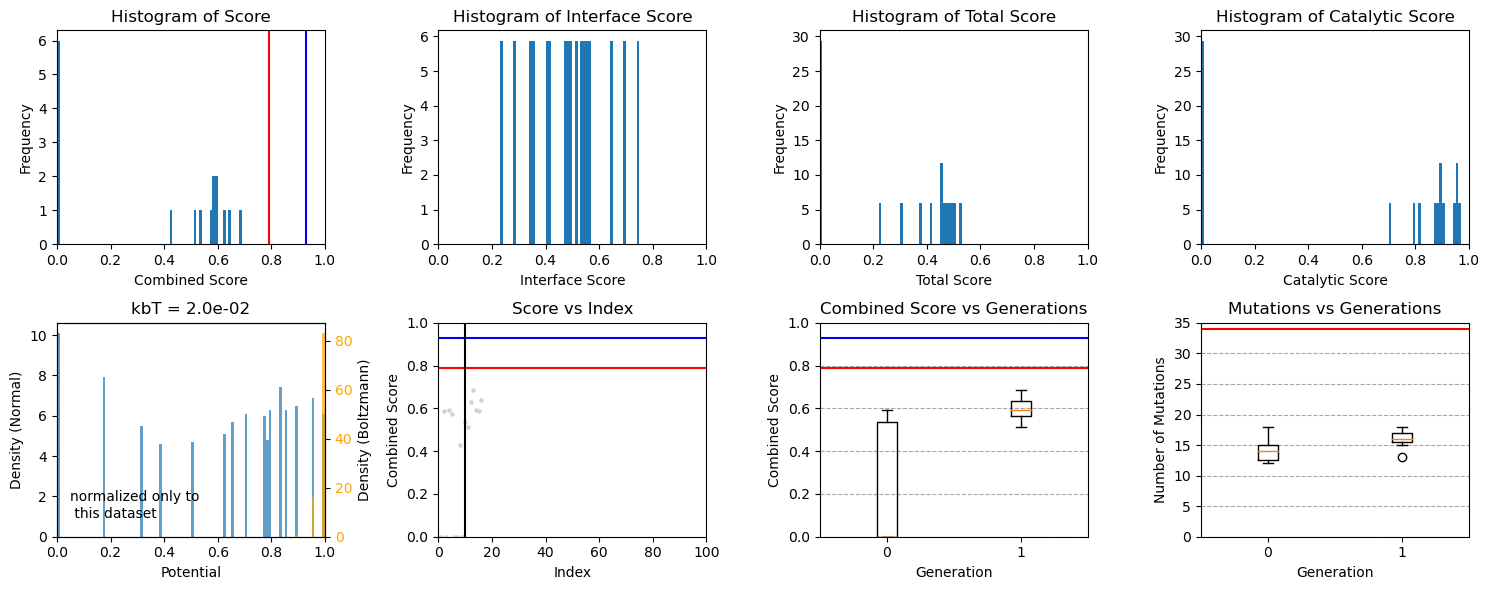

2024-03-17 19:51:43 - INFO - Updated total_score, interface_delta_X, and catalytic_score of index 17.
2024-03-17 19:51:43 - INFO - Index 17 has no relaxed structure, starting ESMfold_Rosetta_Relax.
2024-03-17 19:51:43 - INFO - Run ESMfold & Rosetta_Relax for index 17.
2024-03-17 19:52:45 - INFO - Updated total_score, interface_delta_X, and catalytic_score of index 18.
2024-03-17 19:52:46 - INFO - Updated total_score, interface_delta_X, and catalytic_score of index 19.
2024-03-17 19:52:47 - INFO - Run RosettaDesign for index 20 based on index 11.
2024-03-17 19:52:49 - INFO - Index 19 has no relaxed structure, starting ESMfold_Rosetta_Relax.
2024-03-17 19:52:49 - INFO - Run ESMfold & Rosetta_Relax for index 19.
2024-03-17 19:55:54 - INFO - Updated total_score, interface_delta_X, and catalytic_score of index 13.
2024-03-17 19:55:55 - INFO - Run RosettaDesign for index 21 based on index 13.


In [ ]:
%run "$AIZYME_TOOLS"
controller(RESET=False, EXPLORE=True, UNBLOCK_ALL=False, PRINT_VAR=True, PLOT_DATA=True) 

In [56]:
!qstat | grep AB1
#!qstat | grep AB1 | awk '{print $1}' | xargs -I {} qdel {}

job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
-----------------------------------------------------------------------------------------------------------------
 859177 0.55500 AB1_Rosett bunzelh      r     03/17/2024 19:20:29 regular.q@bs-grid74.ethz.ch        1        
 859178 0.55500 AB1_Rosett bunzelh      r     03/17/2024 19:21:29 regular.q@bs-grid68.ethz.ch        1        
 859179 0.55500 AB1_Rosett bunzelh      r     03/17/2024 19:21:29 regular.q@bs-grid71.ethz.ch        1        
 859180 0.55500 AB1_Rosett bunzelh      r     03/17/2024 19:22:29 regular.q@bs-grid73.ethz.ch        1        
 859181 0.55500 AB1_Rosett bunzelh      r     03/17/2024 19:24:29 regular.q@bs-grid70.ethz.ch        1        


In [67]:
%run "$AIZYME_TOOLS"
all_scores_df = pd.read_csv(f"{DESIGN_FOLDER}/all_scores.csv")
display(all_scores_df)

AIzyme Functions loaded!


,index,sequence,parent_index,interface_score,total_score,catalytic_score,interface_potential,total_potential,catalytic_potential,generation,mutations,design_method,score_taken_from,blocked,cat_resi,cat_resn,kbt_boltzmann,luca
0,0.0,MNTPEHITAVIQRLVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-21.299,-220.219,522.253,-21.299,-220.219,522.253,0.0,15.0,RosettaDesign,Design,False,99.0,GLU,0.02,1ohp
1,1.0,MNTPEHMTAVIQRYVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-16.913,-299.725,11.959,-16.913,-299.725,11.959,0.0,12.0,RosettaDesign,Design,False,99.0,GLU,0.02,1ohp
2,2.0,MNTPEHMTAVIQRFVAALNAGDLDGIVALFADDATVEIPVGSEPRS...,Parent,-19.701,-373.482,5.051,-19.701,-373.482,5.051,0.0,14.0,RosettaDesign,Relax,False,99.0,GLU,0.02,1ohp
3,3.0,MNTPEHITAVIQRIVAAWNAGDLDGIVALFADDATVEVPVGSEPRS...,Parent,-20.331,-232.218,408.378,-20.331,-232.218,408.378,0.0,18.0,RosettaDesign,Design,False,99.0,GLU,0.02,1ohp
4,4.0,MNTPEHITAVVQRWLAALNAGDLDGVVALFADDATVEAPVGSEPRS...,Parent,-20.699,-374.286,8.051,-20.699,-374.286,8.051,0.0,16.0,RosettaDesign,Relax,False,99.0,ASP,0.02,1ohp
5,5.0,MNTPEHITAVVQRWLAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-19.542,-369.010,1.575,-19.542,-369.010,1.575,0.0,14.0,RosettaDesign,Relax,False,99.0,GLU,0.02,1ohp
6,6.0,MNTPEHMTAVVQRWVAAANAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-18.005,-361.574,45.712,-18.005,-361.574,45.712,0.0,15.0,RosettaDesign,Relax,False,99.0,GLU,0.02,1ohp
7,7.0,MNTPEHITAVVQRYVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-15.716,-218.806,483.025,-15.716,-218.806,483.025,0.0,12.0,RosettaDesign,Design,False,99.0,GLU,0.02,1ohp
8,8.0,MNTPEHITAVVQRYVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-14.618,-366.318,3.999,-14.618,-366.318,3.999,0.0,12.0,RosettaDesign,Relax,False,99.0,GLU,0.02,1ohp
9,9.0,MNTPEHMTAVIQRIAAAWNAGDLDGIVALFADDATVENPVGSEPRS...,Parent,-20.859,-186.405,706.969,-20.859,-186.405,706.969,0.0,14.0,RosettaDesign,Design,False,99.0,GLU,0.02,1ohp


In [58]:
%run "$AIZYME_TOOLS"
#get_best_structures()

AIzyme Functions loaded!
